### Part 1 - Import de todas as bibliotecas necessárias 

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



### Part 2 - Leitura do local dataframe + infos básicas

In [17]:
df = pd.read_csv('RTA Dataset.csv')

In [18]:
df.describe(include = 'object')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


In [19]:
df.isnull().sum()   #verificar quantas colunas têm valores nulos

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

### Part 3 - Analisar e eliminar colunas não importantes

Nesta parte, analisamos o que significam algumas colunas que aparentam não ser tão importantes para a nossa análise

In [20]:
#.unique() -> ver todos os valores de uma coluna

type_of_vehicle = df['Type_of_vehicle'].unique()    #ELIMINAR COM CERTEZA -> irrelevante
print(type_of_vehicle, "\n\n")

owner_of_vehicle = df['Owner_of_vehicle'].unique()  #ELIMINAR COM CERTEZA -> irrelevante
print(owner_of_vehicle, "\n\n")

service_year_of_vehicle = df['Service_year_of_vehicle'].unique()    #ELIMINAR COM CERTEZA -> muitos nans
print(service_year_of_vehicle, "\n\n")

defect_of_vehicle = df['Defect_of_vehicle'].value_counts()  #tem 7777 "no defect"
print(defect_of_vehicle, "\n\n")    #ELIMINAR -> DADOS CONFUSOS

area_accident_occured = df['Area_accident_occured'].value_counts() #ELIMINAR -> IRRELEVANTE
print(area_accident_occured, "\n\n")

road_allignment = df['Road_allignment'].value_counts()  #ELIMINAR -> muitos dados iguais -> +80%  
print(road_allignment, "\n\n")

pedestrian_movement = df['Pedestrian_movement'].value_counts()  #ELIMINAR -> dados sem sentido
print(pedestrian_movement, "\n\n")

fitness_of_casuality = df['Fitness_of_casuality'].value_counts()  #ELIMINAR -> faltam dados e muitos iguais
print(fitness_of_casuality, "\n\n")

casualty_class = df['Casualty_class'].value_counts()  #ELIMINAR -> ver matriz de correlação
print(casualty_class, "\n\n")

['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle'] 


['Owner' 'Governmental' nan 'Organization' 'Other'] 


['Above 10yr' '5-10yrs' nan '1-2yr' '2-5yrs' 'Unknown' 'Below 1yr'] 


Defect_of_vehicle
No defect    7777
7              76
5              36
Name: count, dtype: int64 


Area_accident_occured
Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural villag

Após a análise, eliminamos as colunas que afetam pouco a nossa saída, que, como sabemos, é a última coluna: "Gravidade do Acidente"

In [21]:
colunas_a_eliminar = ['Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle', 'Defect_of_vehicle', 'Area_accident_occured',
                      'Road_allignment', 'Pedestrian_movement', 'Fitness_of_casuality', 'Casualty_class', 'Time', 'Day_of_week']

df.drop(colunas_a_eliminar, axis = 1, inplace = True)

In [22]:
df

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,...,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,NaN,No junction,Asphalt roads,Dry,Daylight,...,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,NaN,Moving Backward,Slight Injury
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,2,Going straight,na,na,na,NaN,Overtaking,Slight Injury
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Dry,Daylight,...,Collision with roadside objects,2,2,Going straight,Male,31-50,3,Driver,Changing lane to the left,Serious Injury
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,2,Going straight,Female,18-30,3,Driver,Changing lane to the right,Slight Injury
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,2,Going straight,na,na,na,NaN,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,NaN,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,1,Going straight,na,na,na,Driver,No distancing,Slight Injury
12312,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,1,Other,na,na,na,Driver,No distancing,Slight Injury
12313,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,1,1,Other,Male,31-50,3,Driver,Changing lane to the right,Serious Injury
12314,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,1,Other,na,na,na,Driver,Driving under the influence of drugs,Slight Injury


Agora, para uma melhor compreensão da tabela, vamos renomear as colunas

In [23]:
#time, day_of_week, age_band_of_driver, sex_of_driver, educational_level, vehicle_driver_relation, driving_experience
#type_of_vehicle, owner_of_vehicle, service_year_of_vehicle, defect_of_vehicle, area_accident_occured
#lanes_or_medians, road_allignment, types_of_junction, road_surface_type, road_surface_conditions, ligh_conditions
#weather_conditions, type_of_collision, number_of_vehicles_involved, number_of_casualties, vehicle_movement
#casualty_class, sex_of_casualty, age_band_of_casualty, casualty_severity, work_of_casualty, fitness_of_casualty
#pedestrian_movement, cause_of_accident, accident_severity,
colunas_renomeadas = ['Faixa Etária', 'Género', 'Nível de Educação', 'Relação com o Veículo', 
                      'Experiência de Condução', 'Situação de Faixa', 'Tipo de Cruzamento',
                      'Tipo de Estrada', 'Condições do Piso', 'Condições de Visibilidade',
                      'Condiçoes Meteorológicas', 'Tipo de Colisão', 'N.º Veículos Envolvidos',
                      'Número de Vítimas', 'Movimento do Veículo', 'Género da Vítima',
                      'Faixa Etária da Vítima', 'Gravidade da Vítima', 'Ocupação da Vítima',
                      'Causa do Acidente', 'Gravidade do Acidente']

df.columns = colunas_renomeadas
df

,Faixa Etária,Género,Nível de Educação,Relação com o Veículo,Experiência de Condução,Situação de Faixa,Tipo de Cruzamento,Tipo de Estrada,Condições do Piso,Condições de Visibilidade,...,Tipo de Colisão,N.º Veículos Envolvidos,Número de Vítimas,Movimento do Veículo,Género da Vítima,Faixa Etária da Vítima,Gravidade da Vítima,Ocupação da Vítima,Causa do Acidente,Gravidade do Acidente
0,18-30,Male,Above high school,Employee,1-2yr,NaN,No junction,Asphalt roads,Dry,Daylight,...,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,NaN,Moving Backward,Slight Injury
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,2,Going straight,na,na,na,NaN,Overtaking,Slight Injury
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Dry,Daylight,...,Collision with roadside objects,2,2,Going straight,Male,31-50,3,Driver,Changing lane to the left,Serious Injury
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,2,Going straight,Female,18-30,3,Driver,Changing lane to the right,Slight Injury
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,2,Going straight,na,na,na,NaN,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,NaN,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,1,Going straight,na,na,na,Driver,No distancing,Slight Injury
12312,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,2,1,Other,na,na,na,Driver,No distancing,Slight Injury
12313,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Dry,Daylight,...,Vehicle with vehicle collision,1,1,Other,Male,31-50,3,Driver,Changing lane to the right,Serious Injury
12314,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Dry,Darkness - lights lit,...,Vehicle with vehicle collision,2,1,Other,na,na,na,Driver,Driving under the influence of drugs,Slight Injury


### Part 4 - Análise e substituição de valores nulos

Nesta parte, substituímos os valores escritos "na" por um valor verdadeirmente nulo, "NaN"

In [24]:
df.replace('na', pd.NA, inplace=True)
df.isnull().sum()

Faixa Etária                    0
Género                          0
Nível de Educação             741
Relação com o Veículo         579
Experiência de Condução       829
Situação de Faixa             385
Tipo de Cruzamento            887
Tipo de Estrada               172
Condições do Piso               0
Condições de Visibilidade       0
Condiçoes Meteorológicas        0
Tipo de Colisão               155
N.º Veículos Envolvidos         0
Número de Vítimas               0
Movimento do Veículo          308
Género da Vítima             4443
Faixa Etária da Vítima       4443
Gravidade da Vítima          4443
Ocupação da Vítima           3198
Causa do Acidente               0
Gravidade do Acidente           0
dtype: int64

Aqui percebemos a proporção de cada valor em cada coluna, incluindo os valores nulos

In [25]:
percentage_values = {}
for column in df.columns:
    counts = df[column].value_counts(normalize=True, dropna=False) * 100
    percentage_values[column] = counts

for column, percentages in percentage_values.items():
    print(percentages)
    print()

Faixa Etária
18-30       34.678467
31-50       33.184475
Over 51     12.869438
Unknown     12.569016
Under 18     6.698603
Name: proportion, dtype: float64

Género
Male       92.862943
Female      5.691783
Unknown     1.445274
Name: proportion, dtype: float64

Nível de Educação
Junior high school    61.862618
Elementary school     17.562520
High school            9.012666
NaN                    6.016564
Above high school      2.939266
Writing & reading      1.429035
Unknown                0.811952
Illiterate             0.365378
Name: proportion, dtype: float64

Relação com o Veículo
Employee    78.166613
Owner       16.019812
NaN          4.701202
Other        0.998701
Unknown      0.113673
Name: proportion, dtype: float64

Experiência de Condução
5-10yr        27.305943
2-5yr         21.216304
Above 10yr    18.366353
1-2yr         14.257876
Below 1yr     10.896395
NaN            6.731082
No Licence     0.958103
unknown        0.267944
Name: proportion, dtype: float64

Situação de Fai

Vamos ainda realizar a substituição de valores nulos pela moda da coluna.

Neste passo, fomos apenar substituir os valores nulos cujas colunas tinham menos de 1000 valores "NaN", uma vez que afeta pouco a proporção dos valores

In [26]:
df['Nível de Educação'] = df['Nível de Educação'].fillna(df['Nível de Educação'].mode()[0])
df['Relação com o Veículo'] = df['Relação com o Veículo'].fillna(df['Relação com o Veículo'].mode()[0])
df['Experiência de Condução'] = df['Experiência de Condução'].fillna(df['Experiência de Condução'].mode()[0])
df['Situação de Faixa'] = df['Situação de Faixa'].fillna(df['Situação de Faixa'].mode()[0])
df['Tipo de Cruzamento'] = df['Tipo de Cruzamento'].fillna(df['Tipo de Cruzamento'].mode()[0])
df['Tipo de Estrada'] = df['Tipo de Estrada'].fillna(df['Tipo de Estrada'].mode()[0])
df['Tipo de Colisão'] = df['Tipo de Colisão'].fillna(df['Tipo de Colisão'].mode()[0])
df['Movimento do Veículo'] = df['Movimento do Veículo'].fillna(df['Movimento do Veículo'].mode()[0])

#substituir por valores em que a coluna da gravidade é a mesma

In [27]:
df.isnull().sum()   #verificar quantas colunas têm valores nulos

Faixa Etária                    0
Género                          0
Nível de Educação               0
Relação com o Veículo           0
Experiência de Condução         0
Situação de Faixa               0
Tipo de Cruzamento              0
Tipo de Estrada                 0
Condições do Piso               0
Condições de Visibilidade       0
Condiçoes Meteorológicas        0
Tipo de Colisão                 0
N.º Veículos Envolvidos         0
Número de Vítimas               0
Movimento do Veículo            0
Género da Vítima             4443
Faixa Etária da Vítima       4443
Gravidade da Vítima          4443
Ocupação da Vítima           3198
Causa do Acidente               0
Gravidade do Acidente           0
dtype: int64

In [28]:
#proporções novas de todas as colunas
percentage_values = {}
for column in df.columns:
    counts = df[column].value_counts(normalize=True, dropna=False) * 100
    percentage_values[column] = counts

for column, percentages in percentage_values.items():
    print(percentages)
    print()

Faixa Etária
18-30       34.678467
31-50       33.184475
Over 51     12.869438
Unknown     12.569016
Under 18     6.698603
Name: proportion, dtype: float64

Género
Male       92.862943
Female      5.691783
Unknown     1.445274
Name: proportion, dtype: float64

Nível de Educação
Junior high school    67.879182
Elementary school     17.562520
High school            9.012666
Above high school      2.939266
Writing & reading      1.429035
Unknown                0.811952
Illiterate             0.365378
Name: proportion, dtype: float64

Relação com o Veículo
Employee    82.867814
Owner       16.019812
Other        0.998701
Unknown      0.113673
Name: proportion, dtype: float64

Experiência de Condução
5-10yr        34.037025
2-5yr         21.216304
Above 10yr    18.366353
1-2yr         14.257876
Below 1yr     10.896395
No Licence     0.958103
unknown        0.267944
Name: proportion, dtype: float64

Situação de Faixa
Two-way (divided with broken lines road marking)    38.941215
Undivided Two

# ELIMINAR AS COLUNAS 4000 E TRAZER ALGUMAS DE VOLTA QUE ELIMINÁMOS MAIS CEDO

# várias experiências (exp1 - manter proporção, exp2 - subs pela moda, exp3 - fazer o KNN, exp4 - eliminar colunas)

Ao analisar as 4 colunas com mais de 1000 valores "NA", temos 2 soluções: ou eliminamos as colunas, ou repartimos a sua proporção pelos restantes valores da coluna.

Eliminar uma coluna

In [29]:
colunas_a_eliminar_2 = ['Género da Vítima']
df.drop(colunas_a_eliminar_2, axis = 1, inplace = True)

Repartir a proporção pelos restantes valores das colunas

In [30]:
# Define the columns to process
columns_to_process = ['Gravidade da Vítima', 'Faixa Etária da Vítima', 'Ocupação da Vítima']

for column in columns_to_process:
    # Number of null values in the column
    null_count = df[column].isnull().sum()

    # Proportion of non-null values for each category
    category_proportions = df[column].value_counts(normalize=True)

    # Calculate the number of null values to be distributed for each category
    null_distribution = (category_proportions * null_count).round().astype(int)

    # Randomly assign the null values to each category
    null_indices = df[df[column].isnull()].index
    for category, count in null_distribution.items():
        sample_indices = np.random.choice(null_indices, size=count, replace=False)
        df.loc[sample_indices, column] = category

    # Fill any remaining null values randomly
    remaining_null_indices = df[df[column].isnull()].index
    remaining_categories = list(category_proportions.index)
    for index in remaining_null_indices:
        df.at[index, column] = np.random.choice(remaining_categories)

Num ponto à parte, percebemos que eliminar as linhas com valores nulos não é uma opção, uma vez que perderíamos metade dos dados 

In [31]:
no_linhas_na = df.isna().any(axis=1).sum()

print("Total de linhas com valores NaN", no_linhas_na)

Total de linhas com valores NaN 0


### Part 5 - Fazer matriz de correlação e importância de variáveis

Primeiramente, vamos analisar a matriz de correlação entre as várias variáveis

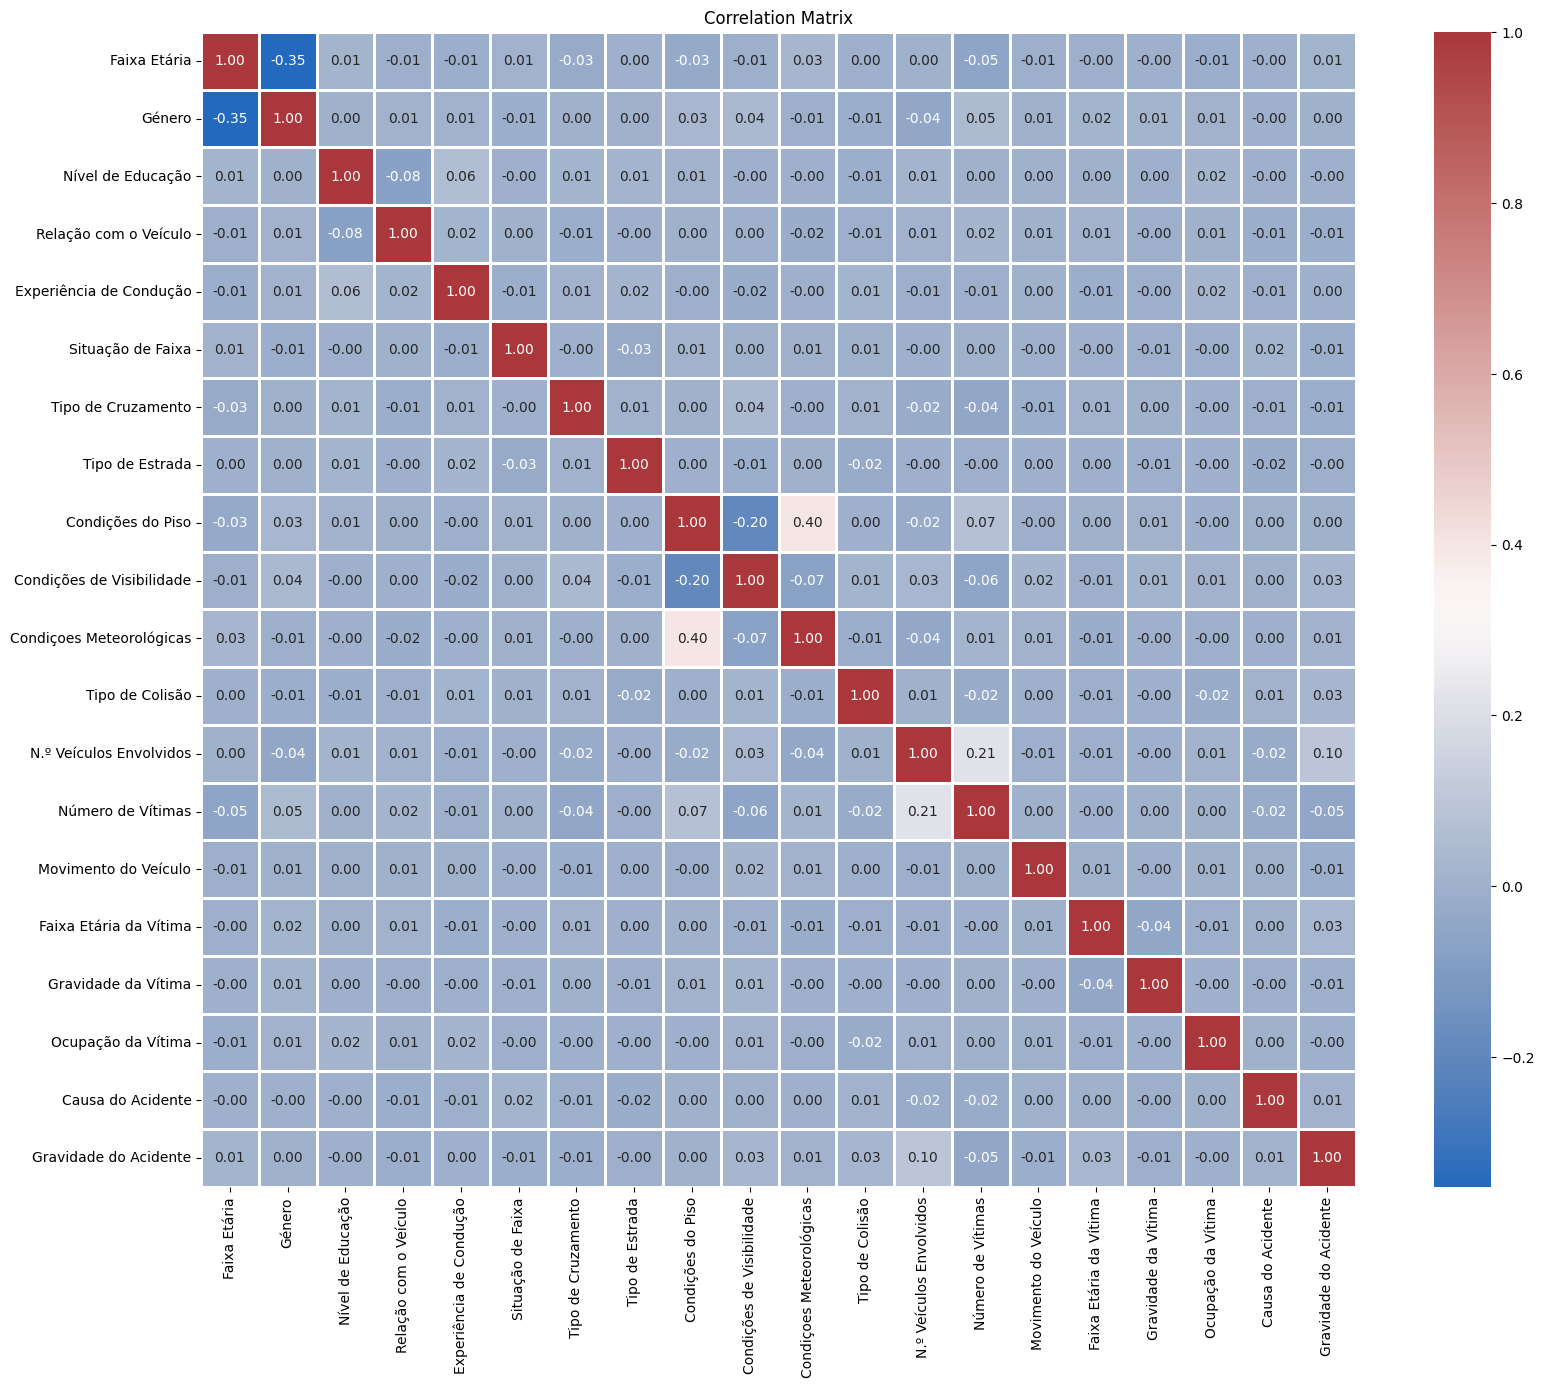

In [32]:
label_encoder = LabelEncoder()  # aplicar Label Encoder a todas as colunas "object"
for column in df.select_dtypes(include = 'object').columns:
    df[column] = label_encoder.fit_transform(df[column])

correlation_matrix = df.corr()
plt.figure(figsize = (20, 15))
sns.heatmap(correlation_matrix, annot = True, cmap = 'vlag', fmt = ".2f", linewidths = 1, square=True)
plt.title('Correlation Matrix')
plt.show()

In [33]:
df

,Faixa Etária,Género,Nível de Educação,Relação com o Veículo,Experiência de Condução,Situação de Faixa,Tipo de Cruzamento,Tipo de Estrada,Condições do Piso,Condições de Visibilidade,Condiçoes Meteorológicas,Tipo de Colisão,N.º Veículos Envolvidos,Número de Vítimas,Movimento do Veículo,Faixa Etária da Vítima,Gravidade da Vítima,Ocupação da Vítima,Causa do Acidente,Gravidade do Acidente
0,0,1,0,0,0,2,1,0,0,3,2,3,2,2,2,0,2,3,9,2
1,1,1,4,0,3,4,1,0,0,3,2,8,2,2,2,0,2,2,16,2
2,0,1,4,0,0,6,1,0,0,3,2,2,2,2,2,1,2,0,0,1
3,0,1,4,0,2,6,7,2,0,0,2,8,2,2,2,0,2,0,1,2
4,0,1,4,0,1,6,7,0,0,0,2,8,2,2,2,3,0,3,16,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1,1,4,0,1,4,1,0,0,3,2,8,2,1,2,0,1,0,10,2
12312,4,1,1,0,2,2,1,0,0,3,2,8,2,1,4,3,2,0,10,2
12313,2,1,4,0,2,2,1,0,0,3,2,8,1,1,4,1,2,0,1,1
12314,0,0,4,0,3,4,1,0,0,0,2,8,2,1,4,1,2,0,5,2


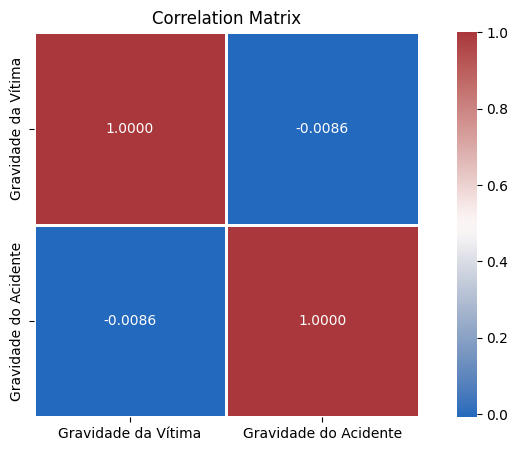

In [34]:
df_2 = df[['Gravidade da Vítima', 'Gravidade do Acidente']]
correlation_matrix = df_2.corr()
plt.figure(figsize = (10, 5))
sns.heatmap(correlation_matrix, annot = True, cmap = 'vlag', fmt = ".4f", linewidths = 1, square=True)
plt.title('Correlation Matrix')
plt.show()

De seguida, analisamos a importância de cada feature para o modelo 

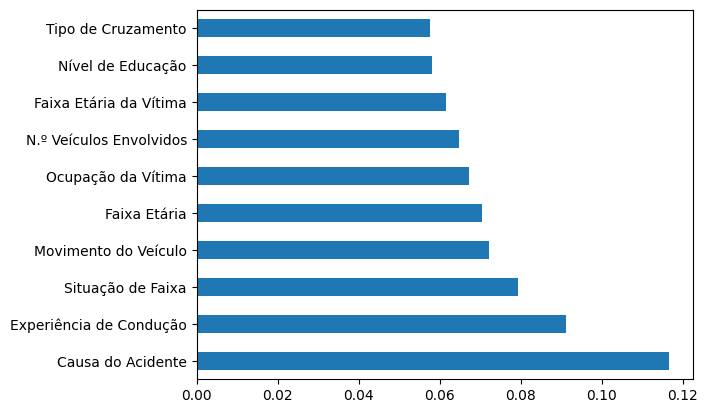

In [35]:
X = df.iloc[:, :-1].values # todas as features
Y =  df.iloc[:, -1].values # feature target

modelo = ExtraTreesClassifier()
modelo.fit(X, Y)

feature_importances = pd.Series(modelo.feature_importances_, index = df.columns[:-1])
feature_importances.nlargest(10).plot(kind='barh')  # mostrar as 10 features mais importantes

plt.show()

Neste ponto, dividimos os dados em sets de treino e de teste, utilizando 25% dos dados para teste e os restantes para teino

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 30)

print("Número de exemplos nos dados de treino: ", X_train.shape[0])
print("Número de exemplos nos dados de teste: ", X_test.shape[0])

Número de exemplos nos dados de treino:  9237
Número de exemplos nos dados de teste:  3079


### Parte 6 - Árvores de Decisão

O primeiro modelo de machine learning utilizado foi o modelo de árvores de decisão.


Primeiro vamos estanderizar as nossas features. Isso é feito para garantir que todas as características tenham a mesma escala, o que pode melhorar o desempenho do algoritmo. 

In [37]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
# O parâmetro max_depth = 4 define a profundidade máxima da árvore de decisão, 
# visto que limitar a profundidade pode ajudar a evitar overfitting, tornando a árvore mais simples.
clf = DecisionTreeClassifier(random_state = 42, criterion = "entropy", max_depth = 4)

# Treino: Arvore de Decisão
clf = clf.fit(X_train, y_train)

# Previsão da resposta --> Teste
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

# Print dos valores accuracy
print('Train data accuracy: ', accuracy_score(y_true = y_train, y_pred = y_train_pred))
print('Test data accuracy: ', accuracy_score(y_true = y_test, y_pred = y_test_pred))
print('Decision tree accuracy: ', accuracy_score(y_test_pred, y_test))



Train data accuracy:  0.8463786943812927
Test data accuracy:  0.850925625202988
Decision tree accuracy:  0.850925625202988
[2 2 2 ... 2 2 2]


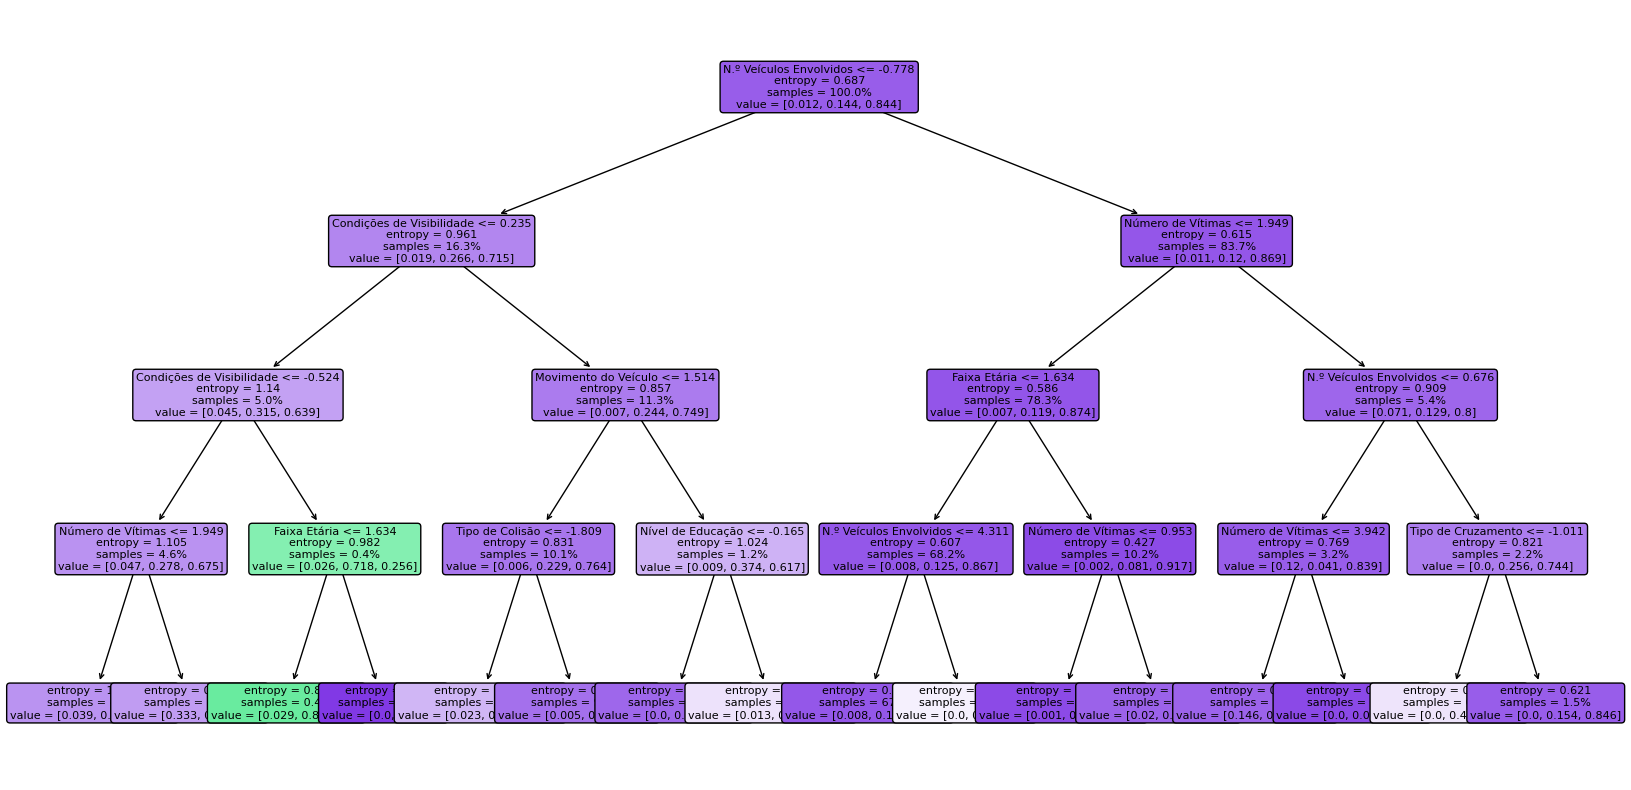

In [39]:
plt.figure(figsize = (20, 10))
tree.plot_tree(clf, fontsize = 8, feature_names = df.columns[:-1], filled = True, rounded = True, proportion=True)
plt.show()

Através do classification report, podemos concluir a acurácia do modelo tal como o recall, a precisão e o f1-score.

In [40]:
print(classification_report(y_test, y_test_pred, zero_division = 1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00        44
           1       0.57      0.01      0.02       416
           2       0.85      1.00      0.92      2619

    accuracy                           0.85      3079
   macro avg       0.81      0.34      0.31      3079
weighted avg       0.82      0.85      0.78      3079



Após realizar um classification report, vamos agora mostrar a matriz de confusão. Assim podemos ver a quantidade de falsos positivos e falsos negativos.

[[   0    0   44]
 [   0    4  412]
 [   0    3 2616]]


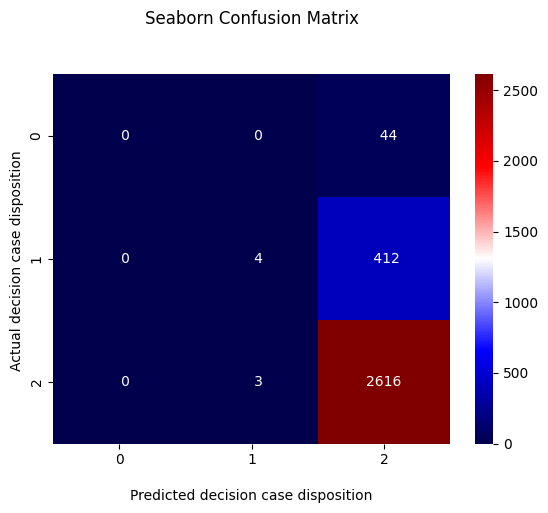

In [41]:
cf_matrix = confusion_matrix(y_test, y_test_pred)

ax = sns.heatmap(cf_matrix, annot = True, cmap = 'seismic', fmt = "4.0f")
ax.set_title('Seaborn Confusion Matrix\n\n')
ax.set_xlabel('\nPredicted decision case disposition')
ax.set_ylabel('Actual decision case disposition ')

print(cf_matrix)

plt.show()